In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/StateData.csv')
len(data), len(data.keys())

(2098, 594)

In [3]:
data.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,16,2016,NaN,10000000,NaN,1,0,0,ALABAMA,1,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,16,2016,NaN,20000000,NaN,2,0,0,ALASKA,2,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,16,2016,NaN,30000000,NaN,3,0,0,ARIZONA,4,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,16,2016,NaN,40000000,NaN,4,0,0,ARKANSAS,5,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,16,2016,NaN,50000000,NaN,5,0,0,CALIFORNIA,6,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


In [5]:
data = data.fillna(0)
data.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,16,2016,0.0,10000000,0.0,1,0,0,ALABAMA,1,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,16,2016,0.0,20000000,0.0,2,0,0,ALASKA,2,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,16,2016,0.0,30000000,0.0,3,0,0,ARIZONA,4,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,16,2016,0.0,40000000,0.0,4,0,0,ARKANSAS,5,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,16,2016,0.0,50000000,0.0,5,0,0,CALIFORNIA,6,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


In [6]:
def missing_data(df):
    missing_data = (~df.astype(bool)).sum().sort_values(ascending=False)
    missing_data = missing_data[missing_data>0]

    print('\033[4m \bNumber \b\033[0m of missing values per column:')
    print(missing_data)
    print()
    print("\033[4m \bPercentage \b\033[0m of missing values per column:")
    print(missing_data/len(df)*100)
    
    return missing_data

In [7]:
missing = missing_data(data)

 Number  of missing values per column:
Cen_Staff_IG_To_State         2098
Enrollment                    2098
General_NEC_IG_To_St          2098
Hosp_Other_IG_To_State        2098
Total_Hospital_IG_To_State    2098
Health_IG_To_State            2098
LTD_Iss_FFC_Gas_Util          2098
Judicial_IG_To_State          2098
Fire_Prot_IG_Local_Govts      2098
Fire_Prot_IG_To_State         2098
LTD_Iss_Unsp_Elec_Util        2098
LTD_Iss_Unsp_Gas_Util         2098
LTD_Iss_Unsp_Trans_Util       2098
LTD_Iss_Unsp_Elem_Educ        2098
LTD_Iss_Unsp_Other_Educ       2098
Fin_Admin_IG_To_State         2098
LTD_Ret_FFC_Gas_Util          2098
Educ_NEC_IG_To_State          2098
LTD_Ret_Unsp_Elec_Utili       2098
LTD_Ret_Unsp_Gas_Util         2098
LTD_Ret_Unsp_Trans_Util       2098
LTD_Ret_Unsp_Elem_Educ        2098
LTD_Ret_Unsp_Other_Educ       2098
Regular_Hwy_IG_To_Sta         2098
Water_Trans_IG_To_Sta         2098
SW_Mgmt_IG_To_State           2098
State_IGR_Highways            2098
State_IGR_Tax_

In [8]:
keys = missing[missing == len(data)].keys().tolist()
print(len(data.keys()), '->', end=' ')
data = data.drop(columns=keys)
print(len(data.keys()))

594 -> 537


### Comparing YearofData with Year4

In [9]:
d = data[data['YearofData'] == data['YearofData']] # removing rows with YearofData = NaN
print(len(d), len(data))
a = d[d['Year4']%100 != d['YearofData']]
b = d[d['Year4']%100 == d['YearofData']]
len(a), len(b), len(d)

2098 2098


(829, 1269, 2098)

### Comparing SurveyYr with Year4

In [10]:
d = data[data['SurveyYr'] == data['SurveyYr']] # removing rows with SurveyYr = NaN
print(len(d), len(data))
a = d[d['Year4']%100 != d['SurveyYr']]
b = d[d['Year4']%100 == d['SurveyYr']]
len(a), len(b), len(d)

2098 2098


(0, 2098, 2098)

In [11]:
del data['SurveyYr'], data['YearofData']
data.head()

,Year4,ID,State_Code,County,Name,FIPS_Code_State,FIPS_County,FIPS_Place,FYEndDate,YearPop,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,2016,10000000,1,0,ALABAMA,1,0.0,0.0,930.0,16.0,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,2016,20000000,2,0,ALASKA,2,0.0,0.0,630.0,16.0,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,2016,30000000,3,0,ARIZONA,4,0.0,0.0,630.0,16.0,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,2016,40000000,4,0,ARKANSAS,5,0.0,0.0,630.0,16.0,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,2016,50000000,5,0,CALIFORNIA,6,0.0,0.0,630.0,16.0,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


### Comparing YearPop with Year4

In [12]:
d = data[data['YearPop'] == data['YearPop']] # selecting rows with YearPop != NaN
print(len(d), len(data))
a = d[d['Year4']%100 != d['YearPop']]
b = d[d['Year4']%100 == d['YearPop']]
len(a), len(b), len(d)

2098 2098


(1742, 356, 2098)

2098


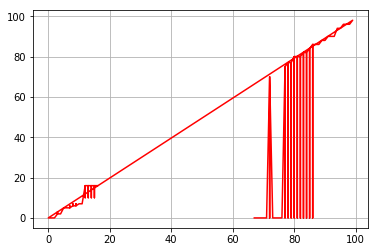

In [13]:
df = data[data['YearPop'] == data['YearPop']]
print(len(df))
plt.plot(df['Year4']%100, df['YearPop'], 'r')
plt.grid()

In [14]:
len(data), len(data[data['Population'] == data['Population']])

(2098, 2098)

In [15]:
del data['YearPop']

### Changing Year4 to Year

In [16]:
data['Year'] = data['Year4']
del data['Year4']
data = data[['Year'] + [c for c in data if c not in ['Year']]]
data.head()

,Year,ID,State_Code,County,Name,FIPS_Code_State,FIPS_County,FIPS_Place,FYEndDate,Population,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,2016,10000000,1,0,ALABAMA,1,0.0,0.0,930.0,4858979,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,2016,20000000,2,0,ALASKA,2,0.0,0.0,630.0,738432,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,2016,30000000,3,0,ARIZONA,4,0.0,0.0,630.0,6828065,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,2016,40000000,4,0,ARKANSAS,5,0.0,0.0,630.0,2978204,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,2016,50000000,5,0,CALIFORNIA,6,0.0,0.0,630.0,39144818,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


### Analysing State Names

In [21]:
set(data['Name'])

{'ALABAMA',
 'ALABAMA STATE GOVT',
 'ALASKA',
 'ALASKA STATE GOVT',
 'ARIZONA',
 'ARIZONA STATE GOVT',
 'ARKANSAS',
 'ARKANSAS STATE GOVT',
 'CALIFORNIA',
 'CALIFORNIA STATE GOVT',
 'COLORADO',
 'COLORADO STATE GOVT',
 'CONNECTICUT',
 'CONNECTICUT STATE GOVT',
 'DELAWARE',
 'DELAWARE STATE GOVT',
 'FLORIDA',
 'FLORIDA STATE GOVT',
 'GEORGIA',
 'GEORGIA STATE GOVT',
 'HAWAII',
 'HAWAII STATE GOVT',
 'IDAHO',
 'IDAHO STATE GOVT',
 'ILLINOIS',
 'ILLINOIS STATE GOVT',
 'INDIANA',
 'INDIANA STATE GOVT',
 'IOWA',
 'IOWA STATE GOVT',
 'KANSAS',
 'KANSAS STATE GOVT',
 'KENTUCKY',
 'KENTUCKY STATE GOVT',
 'LOUISIANA',
 'LOUISIANA STATE GOVT',
 'MAINE',
 'MAINE STATE GOVT',
 'MARYLAND',
 'MARYLAND STATE GOVT',
 'MASSACHUSETTS',
 'MASSACHUSETTS STATE GOVT',
 'MICHIGAN',
 'MICHIGAN STATE GOVT',
 'MINNESOTA',
 'MINNESOTA STATE GOVT',
 'MISSISSIPPI',
 'MISSISSIPPI STATE GOVT',
 'MISSOURI',
 'MISSOURI STATE GOVT',
 'MONTANA',
 'MONTANA STATE GOVT',
 'NEBRASKA',
 'NEBRASKA STATE GOVT',
 'NEVADA',
 'NE

In [22]:
# sum(data.groupby(['Name'])['State_Code'].min() != data.groupby(['Name'])['State_Code'].max())
data.groupby(['Name'])['State_Code'].min()

Name
ALABAMA                       1
ALABAMA STATE GOVT            1
ALASKA                        2
ALASKA STATE GOVT             2
ARIZONA                       3
ARIZONA STATE GOVT            3
ARKANSAS                      4
ARKANSAS STATE GOVT           4
CALIFORNIA                    5
CALIFORNIA STATE GOVT         5
COLORADO                      6
COLORADO STATE GOVT           6
CONNECTICUT                   7
CONNECTICUT STATE GOVT        7
DELAWARE                      8
DELAWARE STATE GOVT           8
FLORIDA                      10
FLORIDA STATE GOVT           10
GEORGIA                      11
GEORGIA STATE GOVT           11
HAWAII                       12
HAWAII STATE GOVT            12
IDAHO                        13
IDAHO STATE GOVT             13
ILLINOIS                     14
ILLINOIS STATE GOVT          14
INDIANA                      15
INDIANA STATE GOVT           15
IOWA                         16
IOWA STATE GOVT              16
                             ..
ORE

In [23]:
states = set(data['Name'])
print(len(states))
states_govt = set([state for state in states if 'STATE GOVT' in state])
states = states - states_govt
print(len(states), len(states_govt))

102
52 50


In [24]:
states = list(states)
states_govt = list(states_govt)
states.sort()
states_govt.sort()

In [25]:
states

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WASHINGTON DC',
 'WASHINGTON DC CITY',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING']

In [26]:
states_govt

['ALABAMA STATE GOVT',
 'ALASKA STATE GOVT',
 'ARIZONA STATE GOVT',
 'ARKANSAS STATE GOVT',
 'CALIFORNIA STATE GOVT',
 'COLORADO STATE GOVT',
 'CONNECTICUT STATE GOVT',
 'DELAWARE STATE GOVT',
 'FLORIDA STATE GOVT',
 'GEORGIA STATE GOVT',
 'HAWAII STATE GOVT',
 'IDAHO STATE GOVT',
 'ILLINOIS STATE GOVT',
 'INDIANA STATE GOVT',
 'IOWA STATE GOVT',
 'KANSAS STATE GOVT',
 'KENTUCKY STATE GOVT',
 'LOUISIANA STATE GOVT',
 'MAINE STATE GOVT',
 'MARYLAND STATE GOVT',
 'MASSACHUSETTS STATE GOVT',
 'MICHIGAN STATE GOVT',
 'MINNESOTA STATE GOVT',
 'MISSISSIPPI STATE GOVT',
 'MISSOURI STATE GOVT',
 'MONTANA STATE GOVT',
 'NEBRASKA STATE GOVT',
 'NEVADA STATE GOVT',
 'NEW HAMPSHIRE STATE GOVT',
 'NEW JERSEY STATE GOVT',
 'NEW MEXICO STATE GOVT',
 'NEW YORK STATE GOVT',
 'NORTH CAROLINA STATE GOVT',
 'NORTH DAKOTA STATE GOVT',
 'OHIO STATE GOVT',
 'OKLAHOMA STATE GOVT',
 'OREGON STATE GOVT',
 'PENNSYLVANIA STATE GOVT',
 'RHODE ISLAND STATE GOVT',
 'SOUTH CAROLINA STATE GOVT',
 'SOUTH DAKOTA STATE G

In [27]:
state_wise = data.groupby(['Name'])['Year']
state_wise_year_min = state_wise.min()
state_wise_year_max = state_wise.max()

In [28]:
[(state, state_wise_year_min[state], state_wise_year_max[state]) for state in states]

[('ALABAMA', 2007, 2016),
 ('ALASKA', 2007, 2016),
 ('ARIZONA', 2007, 2016),
 ('ARKANSAS', 2007, 2016),
 ('CALIFORNIA', 2007, 2016),
 ('COLORADO', 2007, 2016),
 ('CONNECTICUT', 2007, 2016),
 ('DELAWARE', 2007, 2016),
 ('FLORIDA', 2007, 2016),
 ('GEORGIA', 2007, 2016),
 ('HAWAII', 2007, 2016),
 ('IDAHO', 2007, 2016),
 ('ILLINOIS', 2007, 2016),
 ('INDIANA', 2007, 2016),
 ('IOWA', 2007, 2016),
 ('KANSAS', 2007, 2016),
 ('KENTUCKY', 2007, 2016),
 ('LOUISIANA', 2007, 2016),
 ('MAINE', 2007, 2016),
 ('MARYLAND', 2007, 2016),
 ('MASSACHUSETTS', 2007, 2016),
 ('MICHIGAN', 2007, 2016),
 ('MINNESOTA', 2007, 2016),
 ('MISSISSIPPI', 2007, 2016),
 ('MISSOURI', 2007, 2016),
 ('MONTANA', 2007, 2016),
 ('NEBRASKA', 2007, 2016),
 ('NEVADA', 2007, 2016),
 ('NEW HAMPSHIRE', 2007, 2016),
 ('NEW JERSEY', 2007, 2016),
 ('NEW MEXICO', 2007, 2016),
 ('NEW YORK', 2007, 2016),
 ('NORTH CAROLINA', 2007, 2016),
 ('NORTH DAKOTA', 2007, 2016),
 ('OHIO', 2007, 2016),
 ('OKLAHOMA', 2007, 2016),
 ('OREGON', 2007, 2016

In [29]:
[(state, state_wise_year_min[state], state_wise_year_max[state]) for state in states_govt]

[('ALABAMA STATE GOVT', 1972, 2006),
 ('ALASKA STATE GOVT', 1972, 2006),
 ('ARIZONA STATE GOVT', 1972, 2006),
 ('ARKANSAS STATE GOVT', 1972, 2006),
 ('CALIFORNIA STATE GOVT', 1972, 2006),
 ('COLORADO STATE GOVT', 1972, 2006),
 ('CONNECTICUT STATE GOVT', 1972, 2006),
 ('DELAWARE STATE GOVT', 1972, 2006),
 ('FLORIDA STATE GOVT', 1972, 2006),
 ('GEORGIA STATE GOVT', 1972, 2006),
 ('HAWAII STATE GOVT', 1972, 2006),
 ('IDAHO STATE GOVT', 1972, 2006),
 ('ILLINOIS STATE GOVT', 1972, 2006),
 ('INDIANA STATE GOVT', 1972, 2006),
 ('IOWA STATE GOVT', 1972, 2006),
 ('KANSAS STATE GOVT', 1972, 2006),
 ('KENTUCKY STATE GOVT', 1972, 2006),
 ('LOUISIANA STATE GOVT', 1972, 2006),
 ('MAINE STATE GOVT', 1972, 2006),
 ('MARYLAND STATE GOVT', 1972, 2006),
 ('MASSACHUSETTS STATE GOVT', 1972, 2006),
 ('MICHIGAN STATE GOVT', 1972, 2006),
 ('MINNESOTA STATE GOVT', 1972, 2006),
 ('MISSISSIPPI STATE GOVT', 1972, 2006),
 ('MISSOURI STATE GOVT', 1972, 2006),
 ('MONTANA STATE GOVT', 1972, 2006),
 ('NEBRASKA STATE G

In [30]:
print(data['Name'].sort_values().head(20))
data['Name'].replace(to_replace=states_govt, value=[state.replace(' STATE GOVT', '') for state in states_govt], inplace=True)
print(data['Name'].sort_values().head(20))

0                  ALABAMA
357                ALABAMA
204                ALABAMA
408                ALABAMA
459                ALABAMA
153                ALABAMA
306                ALABAMA
51                 ALABAMA
255                ALABAMA
102                ALABAMA
918     ALABAMA STATE GOVT
969     ALABAMA STATE GOVT
1326    ALABAMA STATE GOVT
2044    ALABAMA STATE GOVT
1887    ALABAMA STATE GOVT
867     ALABAMA STATE GOVT
1734    ALABAMA STATE GOVT
1785    ALABAMA STATE GOVT
1428    ALABAMA STATE GOVT
1275    ALABAMA STATE GOVT
Name: Name, dtype: object
0       ALABAMA
1479    ALABAMA
663     ALABAMA
1530    ALABAMA
612     ALABAMA
2044    ALABAMA
561     ALABAMA
1632    ALABAMA
510     ALABAMA
1683    ALABAMA
459     ALABAMA
1734    ALABAMA
714     ALABAMA
51      ALABAMA
357     ALABAMA
1785    ALABAMA
306     ALABAMA
1836    ALABAMA
255     ALABAMA
1887    ALABAMA
Name: Name, dtype: object


In [31]:
data['Name'].replace('WASHINGTON DC', 'WASHINGTON DC CITY', inplace=True)
data.rename(columns={'Name':'State'}, inplace=True)
data.head()

,Year,ID,State_Code,County,State,FIPS_Code_State,FIPS_County,FIPS_Place,FYEndDate,Population,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,2016,10000000,1,0,ALABAMA,1,0.0,0.0,930.0,4858979,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,2016,20000000,2,0,ALASKA,2,0.0,0.0,630.0,738432,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,2016,30000000,3,0,ARIZONA,4,0.0,0.0,630.0,6828065,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,2016,40000000,4,0,ARKANSAS,5,0.0,0.0,630.0,2978204,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,2016,50000000,5,0,CALIFORNIA,6,0.0,0.0,630.0,39144818,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


In [32]:
print(len(set(data['State'])))
set(data['State'])

51


{'ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WASHINGTON DC CITY',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING'}

### Analysing Year

In [33]:
data['Year'].value_counts().sort_index()

1967     1
1970     1
1971     1
1972    51
1973     1
1974     1
1975     1
1976     1
1977    51
1978    51
1979    51
1980    51
1981    51
1982    51
1983    51
1984    51
1985    51
1986    51
1987    51
1988    51
1989    51
1990    51
1991    51
1992    51
1993    51
1994    51
1995    51
1996    51
1997    51
1998    51
1999    51
2000    51
2001    51
2002    51
2003    51
2004    51
2005    51
2006    51
2007    51
2008    51
2009    51
2010    51
2011    51
2012    51
2013    51
2014    51
2015    51
2016    51
Name: Year, dtype: int64

In [34]:
data[data['Year'].isin([1967, 1970, 1971, 1973, 1974, 1975, 1976])]

,Year,ID,State_Code,County,State,FIPS_Code_State,FIPS_County,FIPS_Place,FYEndDate,Population,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
2040,1976,92001001,9,1,WASHINGTON DC CITY,11,1.0,50000.0,0.0,711518,...,0,0,37444,15692,10073,5619,119083,146,45,118892
2041,1975,92001001,9,1,WASHINGTON DC CITY,11,1.0,50000.0,0.0,733801,...,0,0,0,20540,21366,-826,54453,0,0,54453
2042,1974,92001001,9,1,WASHINGTON DC CITY,11,1.0,50000.0,0.0,733801,...,0,0,0,44871,43978,893,118468,0,0,118468
2043,1973,92001001,9,1,WASHINGTON DC CITY,11,1.0,50000.0,0.0,756510,...,0,0,0,56255,53816,2439,83036,0,0,83036
2095,1971,92001001,9,1,WASHINGTON DC CITY,11,1.0,50000.0,0.0,756510,...,0,0,0,71069,70449,620,101073,0,50,101023
2096,1970,92001001,9,1,WASHINGTON DC CITY,11,1.0,50000.0,0.0,756510,...,0,0,0,75806,75412,394,108920,0,80,108840
2097,1967,92001001,9,1,WASHINGTON DC CITY,11,1.0,50000.0,0.0,763956,...,0,0,0,70507,70241,266,30525,0,100,30425


In [35]:
print(len(data))
data = data[data['Year'] >= 1977]
print(len(data))

2098
2040


In [36]:
data.head()

,Year,ID,State_Code,County,State,FIPS_Code_State,FIPS_County,FIPS_Place,FYEndDate,Population,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,2016,10000000,1,0,ALABAMA,1,0.0,0.0,930.0,4858979,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,2016,20000000,2,0,ALASKA,2,0.0,0.0,630.0,738432,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,2016,30000000,3,0,ARIZONA,4,0.0,0.0,630.0,6828065,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,2016,40000000,4,0,ARKANSAS,5,0.0,0.0,630.0,2978204,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,2016,50000000,5,0,CALIFORNIA,6,0.0,0.0,630.0,39144818,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


### Analysing all remaining columns before Population

In [38]:
data.head()

,Year,ID,State_Code,County,State,FIPS_Code_State,FIPS_County,FIPS_Place,FYEndDate,Population,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,2016,10000000,1,0,ALABAMA,1,0.0,0.0,930.0,4858979,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,2016,20000000,2,0,ALASKA,2,0.0,0.0,630.0,738432,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,2016,30000000,3,0,ARIZONA,4,0.0,0.0,630.0,6828065,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,2016,40000000,4,0,ARKANSAS,5,0.0,0.0,630.0,2978204,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,2016,50000000,5,0,CALIFORNIA,6,0.0,0.0,630.0,39144818,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


#### FIPS_County

In [42]:
data[data['FIPS_County'] != 0]['State'].drop_duplicates()

8    WASHINGTON DC CITY
Name: State, dtype: object

In [44]:
len(data), len(data[data['FIPS_County'] == 0]), len(data[data['FIPS_County'] != 0])

(2040, 2000, 40)

In [45]:
del data['FIPS_County']
data.head()

,Year,ID,State_Code,County,State,FIPS_Code_State,FIPS_Place,FYEndDate,Population,Total_Revenue,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,2016,10000000,1,0,ALABAMA,1,0.0,930.0,4858979,30172490,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,2016,20000000,2,0,ALASKA,2,0.0,630.0,738432,8060170,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,2016,30000000,3,0,ARIZONA,4,0.0,630.0,6828065,38241052,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,2016,40000000,4,0,ARKANSAS,5,0.0,630.0,2978204,21431620,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,2016,50000000,5,0,CALIFORNIA,6,0.0,630.0,39144818,322332307,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


#### FIPS_Place

In [46]:
data[data['FIPS_Place'] != 0]['State'].drop_duplicates()

8    WASHINGTON DC CITY
Name: State, dtype: object

In [48]:
len(data), len(data[data['FIPS_Place'] == 0]), len(data[data['FIPS_Place'] != 0])

(2040, 2000, 40)

In [49]:
del data['FIPS_Place']
data.head()

,Year,ID,State_Code,County,State,FIPS_Code_State,FYEndDate,Population,Total_Revenue,Total_Rev_Own_Sources,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,2016,10000000,1,0,ALABAMA,1,930.0,4858979,30172490,20650521,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,2016,20000000,2,0,ALASKA,2,630.0,738432,8060170,5206968,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
2,2016,30000000,3,0,ARIZONA,4,630.0,6828065,38241052,23700590,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
3,2016,40000000,4,0,ARKANSAS,5,630.0,2978204,21431620,14000079,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
4,2016,50000000,5,0,CALIFORNIA,6,630.0,39144818,322332307,227996024,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


#### FYEndDate

In [50]:
unique_fyenddate = set(data[data['FYEndDate']==data['FYEndDate']]['FYEndDate'])
unique_fyenddate

{0.0, 331.0, 630.0, 831.0, 930.0}

In [51]:
for enddate in unique_fyenddate:
    print(enddate, len(data[data['FYEndDate']==enddate]))

0.0 251
930.0 109
331.0 35
630.0 1610
831.0 35


In [52]:
ed = 331
x = set(data[data['FYEndDate']==ed]['State'])
print(x)
data[(data['State'].isin(x)) & (data['FYEndDate']!=ed)][['Year', 'State', 'FYEndDate']]

{'NEW YORK'}


,Year,State,FYEndDate
287,2011,NEW YORK,0.0
338,2010,NEW YORK,0.0
389,2009,NEW YORK,0.0
440,2008,NEW YORK,0.0
491,2007,NEW YORK,0.0


In [53]:
ed = 831
x = set(data[data['FYEndDate']==ed]['State'])
print(x)
data[(data['State'].isin(x)) & (data['FYEndDate']!=ed)][['Year', 'State', 'FYEndDate']]

{'TEXAS'}


,Year,State,FYEndDate
298,2011,TEXAS,0.0
349,2010,TEXAS,0.0
400,2009,TEXAS,0.0
451,2008,TEXAS,0.0
502,2007,TEXAS,0.0


In [54]:
ed = 930
x = set(data[data['FYEndDate']==ed]['State'])
print(x)
data[(data['State'].isin(x)) & (data['FYEndDate']!=ed)][['Year', 'State', 'FYEndDate']]

{'ALABAMA', 'WASHINGTON DC CITY', 'MICHIGAN'}


,Year,State,FYEndDate
255,2011,ALABAMA,0.0
277,2011,MICHIGAN,0.0
306,2010,ALABAMA,0.0
328,2010,MICHIGAN,0.0
357,2009,ALABAMA,0.0
379,2009,MICHIGAN,0.0
408,2008,ALABAMA,0.0
430,2008,MICHIGAN,0.0
459,2007,ALABAMA,0.0
481,2007,MICHIGAN,0.0


In [55]:
ed = 630
x = set(data[data['FYEndDate']==ed]['State'])
print(len(x), x)
df = data[(data['State'].isin(x)) & (data['FYEndDate']!=ed)][['Year', 'State', 'FYEndDate']]

print(len(df[df['FYEndDate'] == df['FYEndDate']])) # Non Null values
print(df['Year'].min(), df['Year'].max())

46 {'WEST VIRGINIA', 'NEBRASKA', 'UTAH', 'ALASKA', 'VIRGINIA', 'MARYLAND', 'FLORIDA', 'PENNSYLVANIA', 'INDIANA', 'IOWA', 'IDAHO', 'CALIFORNIA', 'NEW MEXICO', 'ARIZONA', 'COLORADO', 'WISCONSIN', 'DELAWARE', 'OREGON', 'RHODE ISLAND', 'SOUTH CAROLINA', 'HAWAII', 'KENTUCKY', 'SOUTH DAKOTA', 'MINNESOTA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'ILLINOIS', 'ARKANSAS', 'WASHINGTON', 'MISSISSIPPI', 'MAINE', 'MASSACHUSETTS', 'KANSAS', 'TENNESSEE', 'VERMONT', 'WYOMING', 'NORTH CAROLINA', 'LOUISIANA', 'GEORGIA', 'MISSOURI', 'NORTH DAKOTA', 'MONTANA', 'OHIO', 'NEVADA', 'CONNECTICUT', 'OKLAHOMA'}
230
2007 2011


In [56]:
print(len(set(data[data['FYEndDate']!=data['FYEndDate']]['State'])))
print(set(data[data['FYEndDate']!=data['FYEndDate']]['Year']))
data[(data['FYEndDate']!=data['FYEndDate']) & (data['Year']==1993)]

0
set()


,Year,ID,State_Code,County,State,FIPS_Code_State,FYEndDate,Population,Total_Revenue,Total_Rev_Own_Sources,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec


### Filling Missing values for FYEndDate

In [57]:
len(data[data['FYEndDate']!=data['FYEndDate']])

0

In [58]:
data.loc[:, 'FYEndDate'] = 630.0
data.loc[data['State']=='NEW YORK', 'FYEndDate'] = 331.0
data.loc[data['State']=='TEXAS', 'FYEndDate'] = 831.0
data.loc[data['State'].isin(['MICHIGAN', 'ALABAMA', 'WASHINGTON DC CITY']), 'FYEndDate'] = 930.0

C:\Users\Apar\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [59]:
data['FYEndDate'] = data['FYEndDate'].astype(np.int64)

C:\Users\Apar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
for state in ['NEW YORK', 'TEXAS', 'MICHIGAN', 'ALABAMA', 'WASHINGTON DC CITY']:
    print(state, set(data[data['State']==state]['FYEndDate']))
    
print('ALL OTHERS:', set(data[~data['State'].isin(['NEW YORK', 'TEXAS', 'MICHIGAN', 'ALABAMA', 'WASHINGTON DC CITY'])]['FYEndDate']))

NEW YORK {331}
TEXAS {831}
MICHIGAN {930}
ALABAMA {930}
WASHINGTON DC CITY {930}
ALL OTHERS: {630}


In [61]:
len(data[data['FYEndDate']!=data['FYEndDate']])

0

In [62]:
data.to_csv('data/Cleaned_StateData_1.csv', index=False)

In [63]:
data['Total_LTD_Ret_Unsp']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
2029    0
2030    0
2031    0
2032    0
2033    0
2034    0
2035    0
2036    0
2037    0
2038    0
2039    0
Name: Total_LTD_Ret_Unsp, Length: 2040, dtype: int64